<center>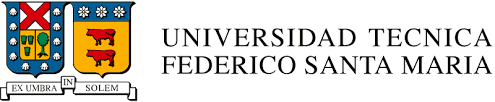</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán.
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automático/archive.zip')

### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> **a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?**

**Respuesta:** Todas la variables del dataset poseen valores numéricos menos la variable *type*, que es de tipo categórico.

La variable target *quality* puede tener doble interpretación, puesto que si se ve la calidad como una categoría puede considerarse una variable de tipo categórica, pero, al mismo tiempo, pueden realizarse operaciones de comparación entre distintos valores de la variable, por lo que también tiene sentido numérico. Para efectos de este apartado, se interpretará la variable como si fuese de tipo numérica.

> b) **¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?**

**Respuesta:** Como se puede ver en la ejecución de la casilla de abajo, existen datos faltantes en la columnas *fixed acidity*, *volatile acidity*, *citric acid*, *residual sugar*, *chlorides*, *pH*, *sulphates*.

En cuanto a la cantidad de datos faltantes, esa información se puede ver en la columna *NaN_Values* de la tabla de abajo.

> **c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)**

**Respuesta:** Existen diversas técnicas para el tratamiento de datos faltantes en un dataset y la que se escoja depende netamente de la naturaleza del mismo.

Una técnica usada corresponde a reemplazar los valores faltantes por el promedio del resto de valores de la columna (imputación por media).

Otra técnica bastante utilizada corresponde a reemplazar por valor 0 los datos faltantes. Sin embargo, hay que tener cuidado con esta técnica, puesto que hay que preguntarse antes qué significa el 0 como dato.

También, los valores faltantes pueden ser reemplazados por un valor aleatorio dentro del conjunto de valores de la columna. Esto tiende a preservar la distribución original de los datos.

In [ ]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps['Min_Value'] = data.min()
    temp_ps['Max_Value'] = data.max()
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100
    return temp_ps

datainfo(df)

,DataType,Min_Value,Max_Value,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,red,white,6497,2,0,0.000000
fixed acidity,float64,3.8,15.9,6487,106,10,0.153917
volatile acidity,float64,0.08,1.58,6489,187,8,0.123134
citric acid,float64,0.0,1.66,6494,89,3,0.046175
residual sugar,float64,0.6,65.8,6495,316,2,0.030783
chlorides,float64,0.009,0.611,6495,214,2,0.030783
free sulfur dioxide,float64,1.0,289.0,6497,135,0,0.000000
total sulfur dioxide,float64,6.0,440.0,6497,276,0,0.000000
density,float64,0.98711,1.03898,6497,998,0,0.000000
pH,float64,2.72,4.01,6488,108,9,0.138525


In [ ]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> **a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo**

**Respuesta:** En las siguientes 2 casillas se realiza la graficación de los histogramas y boxplot para todas las variables del dataset.

Al ver los histogramas, se puede apreciar que la mayoría de los datos se encuentran distribuidos en los valores menores del rango de valores de cada una de la variables. Esto se puede confirmar al ver los boxplot de cada variable, en donde se aprecia gran cantidad de datos atípicos por sobre el cuartil 4.

En el caso particular de la variable *quality*, al ser de naturaleza discreta es claro que en el histograma se generarían barras con *gaps* entre estas. Sin embargo, la altura de estas barras es desproporcional entre ellas, indicando que hay mayor presencia de ciertos valores por sobre otros en el conjunto de datos. En la respuesta de la pregunta **b)** se especifica más esto.

> b) **¿Considera que están *balanceados* los valores de la variable objetivo?**

**Respuesta:** Para nada. Como se puede ver en la casilla ejecutada debajo de los boxplots (en donde se hizo un *value_counts()* de la columna *quality*) se puede ver que la frecuencia de los valores está muy desbalanceada, siendo el valor con mayor cantidad de apariciones el **6** (con 2836 datos) y el valor con menor cantidad de apariciones el **9** (con 5 datos). Además, considerando que la calidad de vino se cataloga entre valores de 0 a 10, el dataset no hay señales de vida de los valores 0, 1, 2 y 10, lo que significa que no tenemos datos de vinos con calidades de valores extremos.


> c) **¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?**

**Respuesta:** Al tener una distribución desigual de los valores objetivo, afecta directamente a las capacidades predictivas del modelo a entrenar. En concreto puede llevar a una **predicción sesgada**, puesto que el modelo tendería a favorecer la predicción de los valores comunes por sobre los valores menos comunes. Además, al existir mayor presencia de datos de ciertas clases, se puede generar sobreajuste a estos valores comunes, teniendo así dificultades en la generalización del modelo para capturar adecuadamente la variabilidad de los valores del rango de la columna objetivo.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

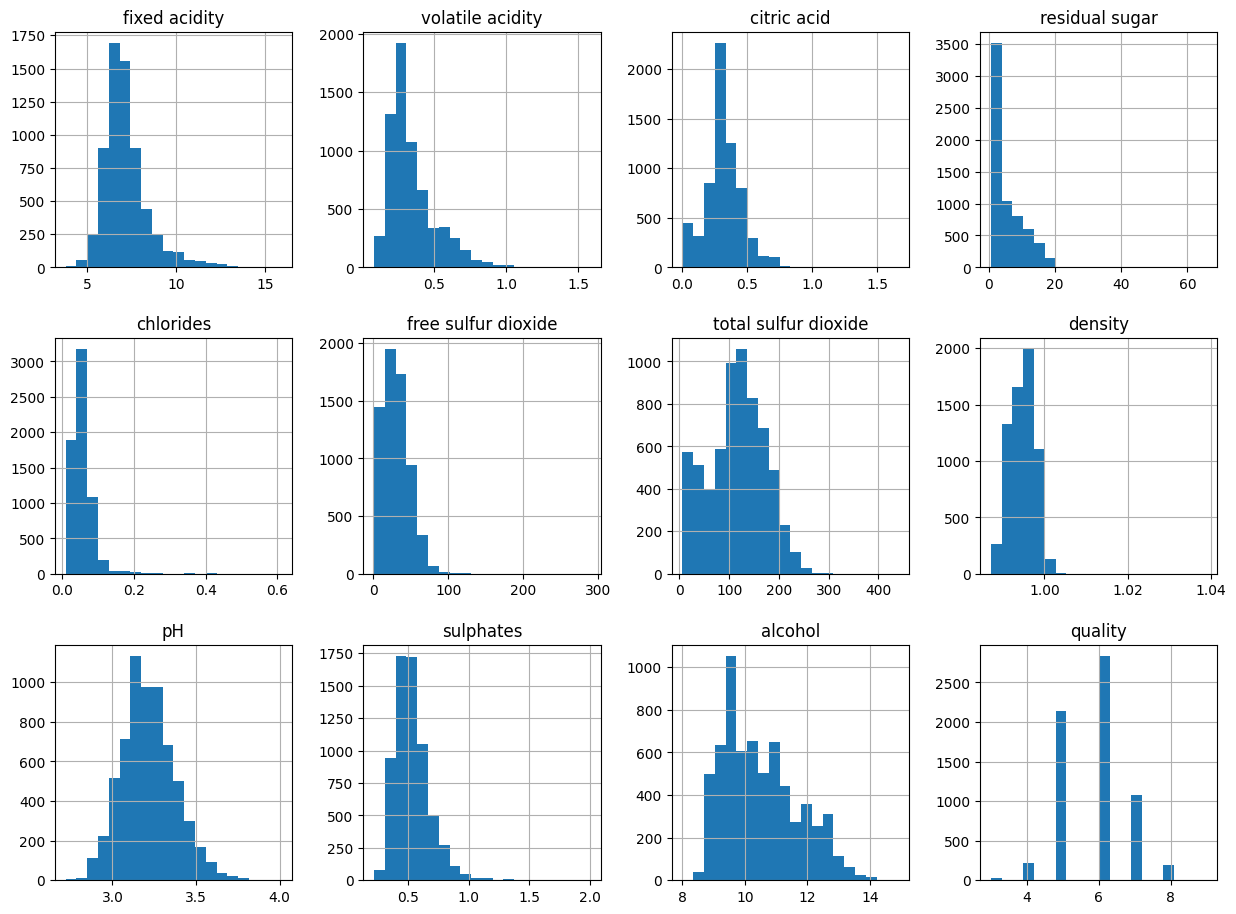

In [ ]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

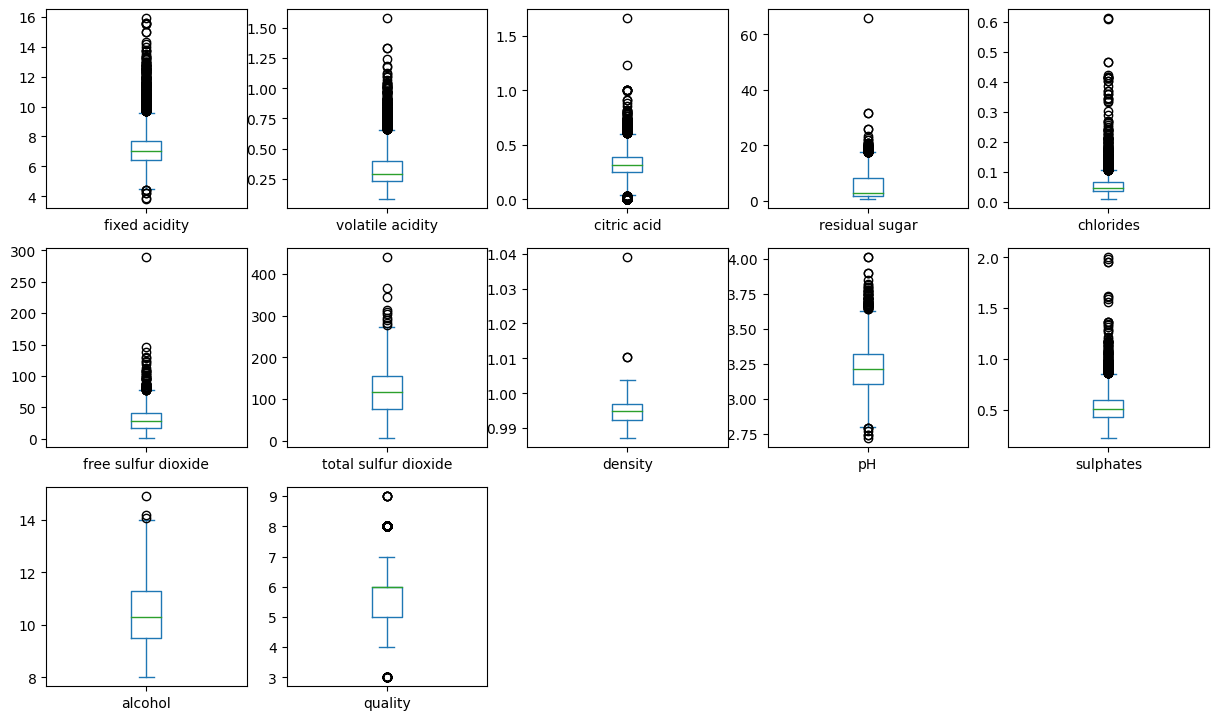

In [ ]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 1.1.3 Separación de conjuntos

> **a) Separe el conjunto entre variables características y variable objetivo.**
  
Listo 👍

> **b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.**

Listo 👍

> **c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de *entrenamiento* y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.**

*Respuesta desde la tercera casilla siguiente.*

Antes de realizar la separación de los conjuntos, se realiza codificación *one hot* sobre la columna *type*. Se realiza en este punto para mantener consistencia entre los conjuntos train y test.

In [ ]:
df = pd.concat([df, pd.get_dummies(df["type"], prefix="type")], axis=1)
df.drop(["type"], axis=1, inplace=True)

In [ ]:
# Separación de conjuntos de datos
X = df.drop(['quality'], axis =1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
# Reemplazo de valores NaN por media de columnas del train set.
# Se reemplaza tanto en train como en test, como dice en el enunciado c)
column_means = X_train.mean()
X_train = X_train.fillna(column_means)
X_test = X_test.fillna(column_means)

In [ ]:
datainfo(X_train)

,DataType,Min_Value,Max_Value,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
fixed acidity,float64,3.90000,15.90000,5197,103,0,0.0
volatile acidity,float64,0.08000,1.58000,5197,181,0,0.0
citric acid,float64,0.00000,1.23000,5197,88,0,0.0
residual sugar,float64,0.60000,65.80000,5197,306,0,0.0
chlorides,float64,0.00900,0.61000,5197,197,0,0.0
free sulfur dioxide,float64,1.00000,289.00000,5197,131,0,0.0
total sulfur dioxide,float64,6.00000,440.00000,5197,270,0,0.0
density,float64,0.98711,1.03898,5197,945,0,0.0
pH,float64,2.72000,4.01000,5197,108,0,0.0
sulphates,float64,0.22000,2.00000,5197,108,0,0.0


In [ ]:
datainfo(X_test)

,DataType,Min_Value,Max_Value,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
fixed acidity,float64,3.80000,14.20000,1300,85,0,0.0
volatile acidity,float64,0.08000,1.18000,1300,124,0,0.0
citric acid,float64,0.00000,1.66000,1300,78,0,0.0
residual sugar,float64,0.60000,23.50000,1300,209,0,0.0
chlorides,float64,0.01200,0.61100,1300,142,0,0.0
free sulfur dioxide,float64,1.00000,108.00000,1300,88,0,0.0
total sulfur dioxide,float64,6.00000,344.00000,1300,231,0,0.0
density,float64,0.98758,1.00369,1300,525,0,0.0
pH,float64,2.79000,3.90000,1300,87,0,0.0
sulphates,float64,0.27000,1.36000,1300,81,0,0.0


Los valores NaN ya fueron reemplazados!!

> **d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.**

In [ ]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0.917867,-0.671071,0.011803,-0.869107,-0.223987,1.568464,-0.059640,-0.963421,-0.741883,0.123771,0.423780,0,1
1,-0.082532,-0.549614,-0.263417,-0.890034,-0.457425,0.012298,-0.095024,-0.976657,-0.243954,-0.009877,0.507497,0,1
2,-0.698162,0.057668,-0.401027,2.541978,0.155350,1.568464,1.444194,1.485261,-0.679641,-0.277172,-1.417991,0,1
3,0.148329,-0.245973,-0.676247,-0.848180,-0.282346,-0.821362,0.329588,-0.625900,-0.866365,1.593893,-0.078521,0,1
4,-0.313393,0.300582,0.149413,0.407434,-1.041019,0.401340,0.294203,-0.850914,-0.243954,-0.611291,1.260948,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,-0.082532,-0.549614,1.181489,-0.513349,-0.749222,-0.043279,-0.360407,-1.453157,-0.555159,-0.945409,1.512099,0,1
5193,-0.313393,-0.003060,0.837464,0.240019,-0.107268,-0.154434,0.701123,0.267538,-0.492918,-0.811762,-0.748256,0,1
5194,0.456144,-0.731799,-0.401027,0.742265,-0.253166,0.401340,0.276511,0.763893,0.191734,-0.009877,-0.245955,0,1
5195,-0.852069,-0.488886,-0.263417,-0.785399,-0.369885,-0.376743,-0.325022,-1.823769,-0.492918,-0.611291,1.679532,0,1


**e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.**

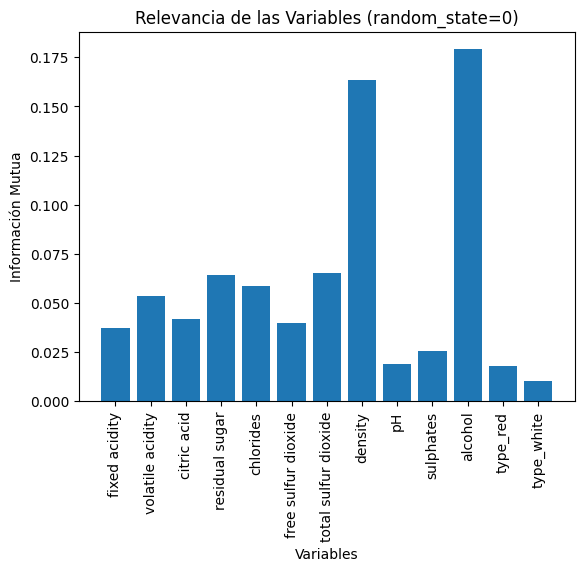

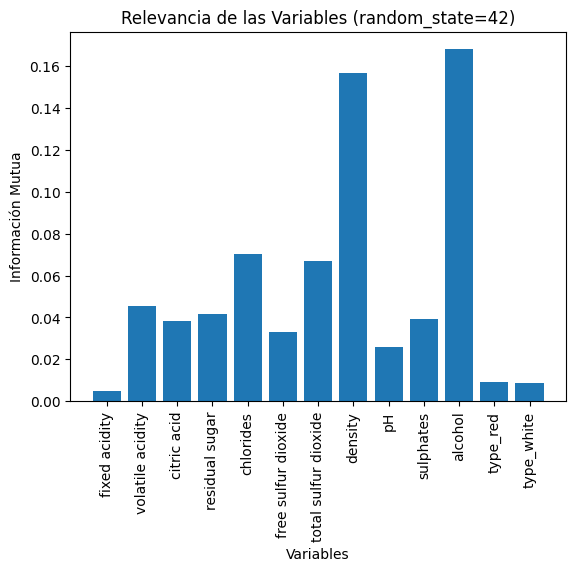

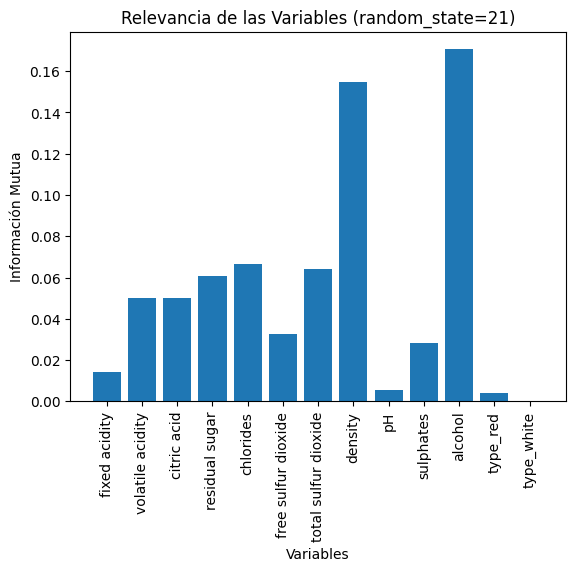

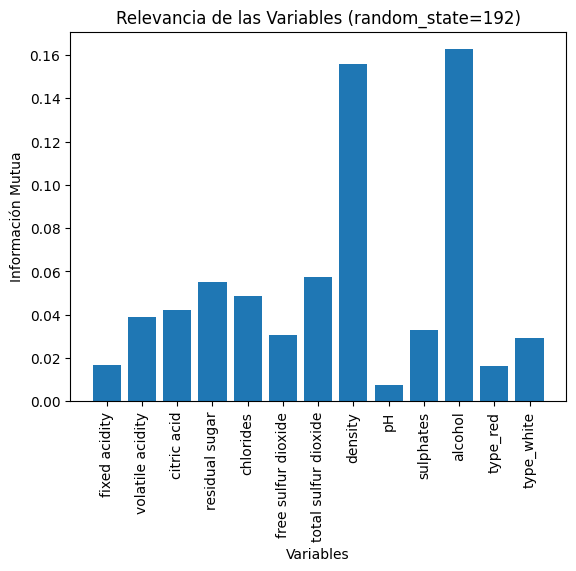

In [ ]:
random_state_list = [0, 42, 21, 192]
for value in random_state_list:
  mu = mutual_info_regression(X_train, y_train.ravel(), random_state=value)

  fig, ax = plt.subplots()
  ax.bar(X_train.columns, mu)

  ax.set_xlabel('Variables')
  ax.set_ylabel('Información Mutua')
  ax.set_title(f'Relevancia de las Variables (random_state={value})')

  plt.xticks(rotation=90)
  plt.show()

Viendo los gráficos generados con diferentes valores de random_state, se aprecia que para todos los casos la variable *density* y *alcohol* son la variables que proveen mayor información sobre el target.

> **f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.**

**Respuesta:** Se escogió las características *fixed acidity*, *pH*, *sulphates*, *type_red*, *type_white* para ser eliminadas, puesto que de todas las gráficas con distintos *random_state* estos atributos son los con menor relevancia.

In [ ]:
X_train_a = X_train
y_train_a = y_train
X_test_a = X_test
y_test_a = y_test

columns_to_delete =['fixed acidity', 'pH', 'sulphates', 'type_red', 'type_white']

X_train_b = X_train.drop(columns_to_delete, axis=1)
y_train_b = y_train
X_test_b = X_test.drop(columns_to_delete, axis=1)
y_test_b = y_test

A = (X_train_a, y_train_a, X_test_a, y_test_a)
B = (X_train_b, y_train_b, X_test_b, y_test_b)

## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije fije los parámetros de la forma:

In [ ]:
#GridSearchCV(estimator, param_grid, scoring=mean_squared_error, refit=True)

Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrnarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> **a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.**

**Respuesta:** Modificar *max_depth* significa variar la profundidad máxima del árbol que se genera en el entrenamiento. A mayor profundidad el modelo se vuelve más complejo verticalmente, generando un compromiso entre generalización y sobreajuste.

> **b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.**

**Respuesta:** Variar este parámetro significa jugar con la complejidad horizontal del modelo, puesto que limita la cantidad de hojas que tendrá el árbol final. Al limitar el número de hojas máximas se restringe la capacidad del árbol para aprender relaciones más complejas entre los datos, pero a su vez esto puede lograr mejores capacidades de generalización.

* Responda las siguientes preguntas:

> **c) ¿Cuántos modelos de árboles de regresión le quedan en total?**

**Respuesta:** Dado que se modificaron dos parámetros con 3 valores diferentes cada uno, en total se generaron 9 árboles de regresión para cada conjunto de datos ($A$ y $B$).

> **d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.**

**Respuesta:** Para la representación $A$, el modelo que entrega mejores resultados es el que tiene como parámetros {'max_depth': 20, 'max_leaf_nodes': 50} con MSE aproximado de **0.7261**.

Para la representación $B$, el modelo que entrega mejores resultados es el que tiene como parámetros {'max_depth': 20, 'max_leaf_nodes': 50} con MSE aproximado de **0.7029**.

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).

In [ ]:
model1 = DecisionTreeRegressor(random_state=0,
                               max_depth=2,
                               max_leaf_nodes=10)
param_grid_model1 = {'max_depth': [2, 20, 200],
                     'max_leaf_nodes': [10, 50, 100]}

In [ ]:
hyper_model1_a = GridSearchCV(estimator=model1, param_grid=param_grid_model1, scoring='neg_mean_squared_error', refit=True)
hyper_model1_a.fit(X_train_a, y_train_a)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=2, max_leaf_nodes=10,
                                             random_state=0),
             param_grid={'max_depth': [2, 20, 200],
                         'max_leaf_nodes': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
hyper_model1_b = GridSearchCV(estimator=model1, param_grid=param_grid_model1, scoring='neg_mean_squared_error', refit=True)
hyper_model1_b.fit(X_train_b, y_train_b)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=2, max_leaf_nodes=10,
                                             random_state=0),
             param_grid={'max_depth': [2, 20, 200],
                         'max_leaf_nodes': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Respuesta para c)
pd.DataFrame(hyper_model1_a.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007818,0.001530,0.001496,0.000067,2,10,"{'max_depth': 2, 'max_leaf_nodes': 10}",-0.723150,-0.778395,-0.736162,-0.878733,-0.741694,-0.771627,0.056606,7
1,0.007538,0.000614,0.001455,0.000029,2,50,"{'max_depth': 2, 'max_leaf_nodes': 50}",-0.723150,-0.778395,-0.736162,-0.878733,-0.741694,-0.771627,0.056606,7
2,0.006966,0.000035,0.001444,0.000036,2,100,"{'max_depth': 2, 'max_leaf_nodes': 100}",-0.723150,-0.778395,-0.736162,-0.878733,-0.741694,-0.771627,0.056606,7
3,0.013112,0.001136,0.001728,0.000357,20,10,"{'max_depth': 20, 'max_leaf_nodes': 10}",-0.712857,-0.728697,-0.691609,-0.831625,-0.694226,-0.731803,0.051692,3
4,0.020838,0.001691,0.001721,0.000299,20,50,"{'max_depth': 20, 'max_leaf_nodes': 50}",-0.689362,-0.755300,-0.708761,-0.796541,-0.680948,-0.726182,0.043597,1
5,0.024026,0.001839,0.001706,0.000046,20,100,"{'max_depth': 20, 'max_leaf_nodes': 100}",-0.726515,-0.769164,-0.766338,-0.823478,-0.717401,-0.760579,0.037651,5
6,0.012557,0.000167,0.001514,0.000059,200,10,"{'max_depth': 200, 'max_leaf_nodes': 10}",-0.712857,-0.728697,-0.691609,-0.831625,-0.694226,-0.731803,0.051692,3
7,0.020816,0.001845,0.001777,0.000228,200,50,"{'max_depth': 200, 'max_leaf_nodes': 50}",-0.689362,-0.755300,-0.708761,-0.796541,-0.680948,-0.726182,0.043597,1
8,0.027951,0.003997,0.003213,0.001918,200,100,"{'max_depth': 200, 'max_leaf_nodes': 100}",-0.726515,-0.769164,-0.766338,-0.823478,-0.717401,-0.760579,0.037651,5


In [ ]:
hyper_model1_a.best_estimator_

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=50, random_state=0)

In [ ]:
hyper_model1_b.best_estimator_

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=50, random_state=0)

In [ ]:
# Respuesta para d)
print(f"Mejores parámetros para A: {hyper_model1_a.best_params_}")
print(f"Mejor puntuación (mean_squared_error) para A: {-1 * (hyper_model1_a.best_score_)}")
print(f"\nMejores parámetros para B: {hyper_model1_b.best_params_}")
print(f"Mejor puntuación (mean_squared_error) para B: {-1 * (hyper_model1_b.best_score_)}")

Mejores parámetros para A: {'max_depth': 20, 'max_leaf_nodes': 50}
Mejor puntuación (mean_squared_error) para A: 0.7261823973564386

Mejores parámetros para B: {'max_depth': 20, 'max_leaf_nodes': 50}
Mejor puntuación (mean_squared_error) para B: 0.702936466900925


> **e) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.**

In [ ]:
y_pred_model1 = y_scaler.inverse_transform(np.array(hyper_model1_b.predict(X_test_b)).reshape(-1, 1))
print(mean_squared_error(y_test_b, y_pred_model1))

0.5667960310770213


### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* **max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.**

**Respuesta:** Modificar *max_depth* significa variar la profundidad máxima de los árboles del bosque que se generan en el entrenamiento.

* **max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.**

**Respuesta:** *max_samples* es un hiperparámetro que modifica la proporción de los datos de entrenamiento que usa cada árbol para su entrenamiento. Es decir, si por ejemplo max_samples es igual a 0.1 cada árbol del bosque toma aleatoriamente una muestra del conjunto de datos de entrenamiento del 10%, y si es igual a 1.0 significa que cada árbol toma el 100% de los datos.

Al cambiar este hiperparámetro se genera un tradeoff entre la representatividad de los datos y la diversidad de estos. Si se tiene un valor de *max_samples* muy bajo, permite tener árboles con muy baja correlación pero con el riesgo de perder la representatividad de los datos. Por otro lado, si *max_samples* es muy grande la correlación entre los árboles aumenta, generado poca diversidad en los estimadores.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responda las siguientes preguntas:

> **a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.**

**Respuesta:** $Averaging$ y $boosting$ son dos grandes familias de métodos de máquinas de ensamblado. Loa métodos de $averaging$ se basan en la idea de generar un conjunto de estimadores y la predicción final corresponden al promedio de la predicción entregada por cada uno de los estimadores del conjunto generado. Esto permite reducir la sensibilidad a los datos de entrenamiento y lograr mayores niveles de generalización.

Por otro lado, los métodos de $boosting$ siguen la filosofía de generar una secuencia de estimadores, donde un estimador posterior trabaja sobre los resultados de un estimador anterior, para, de esta forma iterativa, generar un modelo fuerte. En cada iteración, el modelo se va ajustando mejor mediante la asignación de pesos mayores a las instancias de entrenamiento mal clasificadas anteriormente. Esto permite que el modelo se enfoque más en los casos difíciles de clasificar.

> **b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?**

**Respuesta:** Random Forest corresponde a la familia de métodos $averaging$, puesto que la predicción final del modelo corresponde al promedio de las predicciones de los árboles del bosque.

> **c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.**

**Respuesta:** Para la representación $A$, el modelo que entrega mejores resultados es el que tiene como parámetros {'max_depth': 20, 'max_samples': 1.0} con MSE aproximado de **0.5096**.

Para la representación $B$, el modelo que entrega mejores resultados es el que tiene como parámetros {'max_depth': 200, 'max_samples': 1.0} con MSE aproximado de **0.5244**.

In [ ]:
model2 = RandomForestRegressor(random_state=0,
                               max_depth=2,
                               max_samples=0.1)
param_grid_model2 = {'max_depth': [2, 20, 200],
                     'max_samples': [0.1, 0.5, 1.0]}

In [ ]:
hyper_model2_a = GridSearchCV(estimator=model2, param_grid=param_grid_model2, scoring='neg_mean_squared_error', refit=True)
hyper_model2_a.fit(X_train_a, y_train_a.ravel())

GridSearchCV(estimator=RandomForestRegressor(max_depth=2, max_samples=0.1,
                                             random_state=0),
             param_grid={'max_depth': [2, 20, 200],
                         'max_samples': [0.1, 0.5, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
hyper_model2_b = GridSearchCV(estimator=model2, param_grid=param_grid_model2, scoring='neg_mean_squared_error', refit=True)
hyper_model2_b.fit(X_train_b, y_train_b.ravel())

GridSearchCV(estimator=RandomForestRegressor(max_depth=2, max_samples=0.1,
                                             random_state=0),
             param_grid={'max_depth': [2, 20, 200],
                         'max_samples': [0.1, 0.5, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
# Respuesta para c)
print(f"Mejores parámetros para A: {hyper_model2_a.best_params_}")
print(f"Mejor puntuación (mean_squared_error) para A: {-1 * (hyper_model2_a.best_score_)}")
print(f"\nMejores parámetros para B: {hyper_model2_b.best_params_}")
print(f"Mejor puntuación (mean_squared_error) para B: {-1 * (hyper_model2_b.best_score_)}")

Mejores parámetros para A: {'max_depth': 20, 'max_samples': 1.0}
Mejor puntuación (mean_squared_error) para A: 0.5096070059904005

Mejores parámetros para B: {'max_depth': 200, 'max_samples': 1.0}
Mejor puntuación (mean_squared_error) para B: 0.5243702533048836


In [ ]:
y_pred_model2 = y_scaler.inverse_transform(np.array(hyper_model2_a.predict(X_test_a)).reshape(-1, 1))
print(mean_squared_error(y_test_a, y_pred_model2))

0.3904075840288812


### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* **n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.**

**Respuesta:** Este hiperparámetro indica la cantidad de estimadores a utilizar en el método de Bagging. Un alto número puede genera costos computacionales muy altos, mientras que un número muy bajo puede llevar a un subajuste del modelo.

* **max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.**

**Respuesta:** Igual que en el caso de Random Forest, este parámetro indica el tamaño de la muestra aleatoria del conjunto de entrenamiento que cada estimador utilizará.

Responda las siguientes preguntas:

> **a) ¿Cómo funciona el modelo Bagging?**

**Respuesta:** Pensemos en este video: https://youtu.be/tKwfA8YdG-E?t=93

En donde Naruto utiliza su jutsu multiclones de sombra para aprender el Futoon Rasen Shuriken. Es una analogía perfecta para explicar el método de Bagging.

En primer lugar, del conjunto de datos de entrenamiento se toman diferentes muestras Bootstrap. Una muestra bootstrap corresponde a una muestra del conjunto de datos seleccionada aleatoriamente y con reposición del conjunto de datos. Bajo la idea que los datos más comunes vienen en grupos, al generar muestras bootstrap se pueden omitir potencialmente los datos outliers.

En segundo lugar, cada muestra boostrap es utilizada para entrenar un algoritmo de aprendizaje independiente (como los clones de Naruto).

Finalmente, se toman todas las predicciones realizadas por los modelos entrenados para obtener una predicción final (como cuando Naruto deshace el jutsu para absorber lo que aprendieron sus clones). En el caso de problemas de regresión, la predicción final podría corresponder al promedio de las predicciones de cada uno de los modelos. En el caso que de problemas de clasificación, se pude tomar un enfoque de mayoría de votos u otro.


> **b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.**

**Respuesta:** Bagging corresponde a la familia de métodos $averaging$, tal como se explicó en el punto anterior, en donde la predicción final depende de la combinación de las predicciones de cada uno de los modelos entrenados independientemente.

> **c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.**

**Respuesta:** El modelo que entrega mejores resultados es el que tiene como parámetros {'max_samples': 0.5, 'n_estimators': 1000} con MSE aproximado de **0.6314**.

In [ ]:
estimator = DecisionTreeRegressor(random_state=0,
                                  max_depth=20,
                                  max_leaf_nodes=50)

model3 = BaggingRegressor(estimator=estimator,
                          n_estimators=10,
                          max_samples=0.1,
                          random_state=0)

param_grid_model3 = {'n_estimators': [10, 100, 1000],
                     'max_samples': [0.1, 0.5, 1.0]}

In [ ]:
hyper_model3 = GridSearchCV(estimator=model3, param_grid=param_grid_model3, scoring='neg_mean_squared_error', refit=True)
hyper_model3.fit(X_train_b, y_train_b.ravel())

GridSearchCV(estimator=BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                                        max_leaf_nodes=50,
                                                                        random_state=0),
                                        max_samples=0.1, random_state=0),
             param_grid={'max_samples': [0.1, 0.5, 1.0],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f"Mejores parámetros: {hyper_model3.best_params_}")
print(f"Mejor puntuación (mean_squared_error): {-1 * (hyper_model3.best_score_)}")

Mejores parámetros: {'max_samples': 0.5, 'n_estimators': 1000}
Mejor puntuación (mean_squared_error): 0.631448118529654


In [ ]:
y_pred_model3 = y_scaler.inverse_transform(np.array(hyper_model3.predict(X_test_b)).reshape(-1, 1))
print(mean_squared_error(y_test_b, y_pred_model3))

0.5158471324482691


## 1.3 Conclusiones

**Comente con qué modelo y representación obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?**

**Respuesta:** Para cada uno de los modelos, los mejores resultados fueron los siguientes:

* Árbol de regresión: El mejor resultado se obtuvo con el conjunto $B$ con los parámetros {'max_depth': 20, 'max_leaf_nodes': 50}. El error en el conjunto de test con función de perdida MSE es aproximadamente **0.5668**.
* Random Forest: El mejor resultado se obtuvo con el conjunto $A$ con los parámetros {'max_depth': 20, 'max_samples': 1.0}. El error en el conjunto de test con función de pérdida MSE es de aproximadamente **0.3904**.
* Bagging Regresor: Como el mejor resultado en el primer modelo fue con el conjunto $B$, en este modelo se hizo uso del mismo conjunto. El mejor resultado se obtuvo con los parámetros {'max_samples': 0.5, 'n_estimators': 1000} y el error en el conjunto de test con función de pérdida MSE es de aproximadamente **0.5158**.

En tiempos de entrenamiento, el que menor tiempo tomó fue el modelo de **árbol de regresión**. Seguido de este fue el modelo de **Random Forest** y, por último, el que tomó varios minutos más fue el modelo de **Bagging Regresor**.

Teniendo todo esto en consideración, el modelo que entregó los mejores resultados fue **Random Forest**, puesto que en un bajo tiempo entregó el menor error en el conjunto de test.

Llama la atención que el modelo de Bagging haya tenido resultados ligeramente mejores al árbol de regresión único. Se podría intentar mejorar los resultados cambiando los parámetros del estimador base o aumentar el número de estimadores a utilizar. También se podría intentar realizar varios experimentos con semillas diferentes.

Cabe destacar que todos estos experimentos con el conjunto $B$ fueron realizados con los atributos que fueron escogidos para no ser considerados. Cambiando esta elección puede afectar a los resultados finales que se obtienen.



# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

In [3]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.core import display

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> **a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt**

In [6]:
#/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/activity_labels.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/features.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/features_info.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/README.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/.DS_Store
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/y_test.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/subject_test.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/X_test.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
/content/drive/MyDrive/Aprendizaje Automático/UCI HAR 

In [7]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> **b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.**

In [8]:
train_paths = ['/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt' for signal in SIGNALS]
test_paths = ['/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt' for signal in SIGNALS]

In [9]:
train_paths

['/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.t

In [10]:
test_paths

['/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt',
 '/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt']

> **c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:**
* **n_samples: es el tamaño de la muestra, o sea, el total de experimentos.**
* **signal_len: es el largo de la señal de los sensores.**
* **sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.**


In [11]:
def __load_X(X_signal_paths):
    X_signals = []

    for path in X_signal_paths:
      with open(path, 'r') as file:
          data = [list(map(float, line.strip().split())) for line in file]
          X_signals.append(data)

    X_signals = np.array(X_signals)
    X_signals = np.transpose(X_signals, (1, 2, 0))
    return(X_signals)

In [12]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

In [13]:
x_train.shape

(7352, 128, 9)

In [14]:
x_test.shape

(2947, 128, 9)

> **d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.**

In [15]:
y_train = np.loadtxt('/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/train/y_train.txt',  dtype=np.int32)
y_test = np.loadtxt('/content/drive/MyDrive/Aprendizaje Automático/UCI HAR Dataset/test/y_test.txt', dtype=np.int32)

In [16]:
y_train

array([5, 5, 5, ..., 2, 2, 2], dtype=int32)

In [17]:
y_test

array([5, 5, 5, ..., 2, 2, 2], dtype=int32)

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> **a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?**

**Respuesta:** Corresponde a la primera dimensión de cada uno de los numpy array. Para el caso del conjunto de entrenamiento hay **7352** experimentos y para el conjunto de prueba hay **2947** experimentos.

> **b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?**

**Respuesta:** Para el conjunto de entrenamiento se obtiene **(7352, 128, 9)** y para el conjunto de prueba se obtiene **(2947, 128, 9)**.

> **c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histogramas, boxplots heatmaps de correlación, etc.**

**Respuesta:**

> **d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?**

**Respuesta:** Las dimensiones de cada experimento (sample) deben ser aplanadas en un vector unidimensional. El largo de ese vector unidimensional debe ser igual a la multiplicación de las dimensiones 2 y 3 de las dimensiones originales del conjunto de datos, es decir 128 * 9 = 1152.

> **e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.**

In [18]:
# Respuesta de la e)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [19]:
x_train.shape

(7352, 1152)

In [20]:
x_test.shape

(2947, 1152)

> **f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?**

**Respuesta:** Los atributos de cada sensor quedan intercalados en numpy array modificado. Es decir, las primeras nueve columnas corresponden al primer atributo de cada sensor, las siguientes nueve columnas corresponden al segundo atributo de cada sensor, y así sucesivamente hasta llegar a un número de columnas igual a _signal_len_*_sensor_.

In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
0,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934,0.010139,...,0.099874,0.001576,0.003070,-0.002270,0.028818,-0.000038,-0.001446,1.021171,-0.121326,0.094987
1,0.001094,-0.004688,-0.026860,0.017111,0.006123,0.012268,1.018851,-0.123976,0.097930,0.004550,...,0.089035,-0.001599,-0.007192,-0.003397,-0.038650,-0.009440,-0.002798,1.017849,-0.130519,0.090612
2,0.003531,0.004456,-0.005915,0.026189,-0.000238,0.002159,1.023127,-0.120016,0.091117,0.002285,...,0.082334,0.002178,-0.005442,-0.012784,-0.020235,-0.008831,-0.002645,1.022019,-0.130183,0.081487
3,-0.001772,-0.010185,0.001053,-0.037516,-0.012886,-0.000873,1.017682,-0.133404,0.095152,-0.001311,...,0.083275,-0.000028,-0.001235,-0.004581,-0.007120,0.001951,-0.012987,1.020735,-0.133316,0.081404
4,0.000087,-0.003857,-0.013333,-0.019429,-0.008612,-0.001574,1.019952,-0.128731,0.080841,-0.000272,...,0.085397,-0.003328,0.007404,0.004476,0.015605,0.010797,-0.010082,1.016787,-0.123494,0.088816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,-0.049144,0.383827,-0.503212,-0.097334,0.456170,1.374753,-0.235153,0.309481,0.618763,...,0.099188,-0.211068,0.094188,0.181030,0.169856,0.546431,0.251018,0.769958,-0.134762,0.129060
7348,0.711864,-0.371869,0.262037,-0.174347,-0.135794,0.453560,1.713028,-0.563117,0.209530,0.709237,...,0.236369,-0.124548,-0.038877,0.300351,-0.378067,0.131049,0.234651,0.867896,-0.257222,0.253029
7349,-0.226717,0.056845,0.228927,0.118356,0.426702,0.300847,0.754892,-0.171183,0.174587,-0.177817,...,0.126302,-0.215215,-0.118235,0.180201,-0.627501,0.481254,0.254206,0.776768,-0.327599,0.188621
7350,-0.064806,-0.005741,0.310254,-0.378872,0.164278,0.217504,0.927927,-0.223801,0.262814,-0.079933,...,0.172251,-0.272348,-0.012843,0.250561,-0.412959,0.199823,0.188734,0.719353,-0.229127,0.210071


### 2.1.3 Procesamiento del conjunto de datos

> **a)Transforme las clases a One Hot Encoder**

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


> **b) ¿Estan bien balanceadas las clases?**

**Respuesta:** Al ver la ejecución de las dos casillas siguientes, se puede ver que las clases están bien balanceadas. La diferencia en la frecuencia entre la clase más abundante y la menos abundante es de aproximadamente 400, por lo que la diferencia no es significativa.

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 1226, 2: 1073, 3: 986, 4: 1286, 5: 1374, 6: 1407}

array([[<Axes: title={'center': 'Clases'}>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

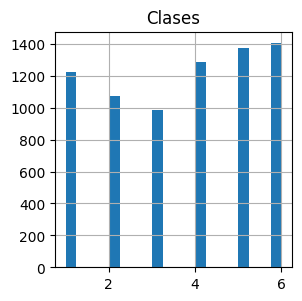

In [ ]:
pd.DataFrame({'Clases': y_train}).hist(figsize=(15,15), layout=(4,4), bins=20)

> **c) Estandarice los atributos con media 0 y variaza 1.**

Listo 👍

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> **a) ¿Cómo se entrena una red neuronal feedforward?**

**Respuesta:** Entrenar una red neuronal feedforward implica los siguientes pasos:

1. Inicialización de pesos y sesgos.
2. Forward propagation para obtener las salidas de cada capa.
3. Cálculo de la función de pérdida para medir la discrepancia entre las salidas predichas y las esperadas.
4. Backpropagation para calcular los gradientes de los pesos y los sesgos.
5. Actualización de pesos y sesgos utilizando el algoritmo de optimización del gradiente descendente.
6. Repetición de los pasos 2 a 5 para varias épocas de entrenamiento.

> **b) ¿Qué es una neurona en este contexto?**

**Respuesta:** Un neurona en el contexto de las redes neuronales feedforward es una unidad de procesamiento que toma entradas ponderadas, las procesa con el uso de una función de activación determinada (la cual puede ir cambiando a lo largo de las capas de la red) y genera una salida, la cual es entrada de otra neurona en una capa diferente de la red. De esta forma se genera la capacidad de la red para "aprender" y realizar tareas de clasificación u otras tareas de procesamiento de datos.

> **c) ¿Qué es una función de activación y para que sirven?**

**Respuesta:** Una función de activación es una función matemática aplicada a la salida de una neurona en una red neuronal. Sirve para realizar la combinación de todas las entradas de la neurona y entrega la salida de esta introduciendo, además, no linealidad en la red. Existen diversas funciones de activación comunes, como la sigmoide, ReLU, tanh y softmax.

> **d) ¿A qué se le llama capa densa?**

**Respuesta:** Una capa densa en una red neuronal es una capa en la que cada neurona está conectada a todas las neuronas de la capa anterior, permitiendo que todas las características o entradas se consideren en la generación de las salidas.

> **e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?**

**Respuesta:** Considerando que la dimensión de la entrada es $N$, la dimensión de la salida es $M$, la cantidad de capas ocultas es $L$ y la cantidad de neuronas de una capa oculta $i$ es $H_i$ con $i$ $\in$ {$1..L$}. Entonces, el total de pesos de la red está dado por:
$$(N \cdot H_1 + H_1) + (\sum_{i=1}^{L-1} H_i \cdot H_{i+1} + H_{i+1}) + (H_L \cdot M + M)$$

Donde el término aditivo dentro de cada paréntesis corresponde al sesgo de la capa respectiva.

> **f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?**

**Respuesta:** El gradiente desvaneciente es un fenómeno en el que los gradientes se vuelven muy pequeños (casi 0) a medida que se retropropagan hacia las capas anteriores de una red neuronal. Esto puede llevar a un entrenamiento ineficiente, ya que las capas anteriores reciben actualizaciones mínimas en sus pesos, lo que limita su contribución al aprendizaje de la red.

Por otro lado, el gradiente explosivo ocurre cuando los gradientes se vuelven demasiado grandes, lo que puede causar problemas numéricos e inestabilidad durante el entrenamiento. Estos fenómenos pueden dificultar la convergencia y el buen rendimiento de la red neuronal.

Para mitigar estos problemas, se utilizan técnicas como la inicialización adecuada de los pesos, funciones de activación apropiadas y métodos de optimización y regularización adaptativos.

> **g) Para esta tarea, como debería ser la capa de salida de la red considerando que previamente aplicó una transformación One Hot Encoding a las clases del conjunto?**

**Respuesta:** La capa de salida de la red neuronal debería tener el mismo número de neuronas que la cantidad de clases del vector target. Además, como se trata de un problema de clasificación, lo mejor es utilizar como función de activación en la capa de salida la función *softmax* para obtener así una distribución de probabilidad sobre las clases.

> **h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parámetros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:**

* **input_layer -> output_layer**

* **input_layer -> hidden_layer(32, tanh) -> output_layer**

* **input_layer -> hidden_layer(32, sigmoid) -> output_layer**

* **input_layer -> hidden_layer(32, relu) -> output_layer**

> **i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).**

**Respuesta:** Para el caso de red ANN1, se tiene que $N=1152$, $M=6$, $L=0$. Entonces, se tiene que la cantidad de pesos es igual a:
$$(N+1)\cdot M = (1152+1)\cdot 6 = 6918$$

Lo cual es exactamente lo que entrega el *summary*. Ahora, con el resto de modelos basta con calcular sólo una vez, pues la arquitectura de la red es la misma. En concreto, tanto para ANN2, ANN3 y ANN4 se tiene que $N=1152$, $M=6$, $L=1$ y $H_1 = 32$. Entonces, el cálculo queda:
$$(1152 \cdot 32 + 32)+(32 \cdot 6 + 6) = 37094$$

lo cual, nuevamente, es exactamente igual a lo que entrega *summary*.

In [ ]:
# Red neuronal: input_layer -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(input_layer)

ANN1 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
ANN1.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 1152)]            0         
                                                                 
 dense_42 (Dense)            (None, 6)                 6918      
                                                                 
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Red neuronal: input_layer -> hidden_layer(32, tanh) -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
layer_1 = tf.keras.layers.Dense(units=32, activation='tanh')(input_layer)
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(layer_1)

ANN2 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
ANN2.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 1152)]            0         
                                                                 
 dense_43 (Dense)            (None, 32)                36896     
                                                                 
 dense_44 (Dense)            (None, 6)                 198       
                                                                 
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Red neuronal: input_layer -> hidden_layer(32, sigmoid) -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
layer_1 = tf.keras.layers.Dense(units=32, activation='sigmoid')(input_layer)
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(layer_1)

ANN3 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
ANN3.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 1152)]            0         
                                                                 
 dense_45 (Dense)            (None, 32)                36896     
                                                                 
 dense_46 (Dense)            (None, 6)                 198       
                                                                 
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Red neuronal: input_layer -> hidden_layer(32, relu) -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
layer_1 = tf.keras.layers.Dense(units=32, activation='relu')(input_layer)
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(layer_1)

ANN4 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
ANN4.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 1152)]            0         
                                                                 
 dense_47 (Dense)            (None, 32)                36896     
                                                                 
 dense_48 (Dense)            (None, 6)                 198       
                                                                 
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


> **j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:**

* **¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?**

**Respusta:** Se debería monitorear el error de validación, puesto que si este empieza a aumentar mientras el error de entrenamiento sigue bajando, es claro indicio que el entrenamiento está generando un modelo sobreajustado a los datos.

* **¿Qué es la paciencia en este contexto?**

**Respuesta:** La *paciencia* indica el número de épocas que deben transcurrir sin mejora de la cantidad monitoreada antes de interrumpir el entrenamiento.

* **¿Para qué se usa el parámetro min_delta?**

**Respuesta:** El parámetro *min_delta* indica la el cambio de valor mínimo que debe realizarse en la cantidad monitoreada para identificarse como una mejora. Si es que todos los cambios de valor están por debajo del valor de este parámetro, el contador de paciencia aumenta.

> **k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:**

* **¿Qué función de pérdida se debe usar para este problema (loss)?**

**Respuesta:** Para un problema de clasificación multiclase, se debe utilizar la función de pérdida "categorical_crossentropy". Esta función de pérdida es comúnmente utilizada en problemas de esta índole donde las clases están codificadas en formato One Hot. Con esta función se minimiza la pérdida entre las probabilidades predichas y las clases reales.

>**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [ ]:
early_stop = EarlyStopping(monitor='val_categorical_accuracy', mode='max', verbose=1, patience=50)

In [ ]:
ANN1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN4.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

> **l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.**

* **¿Qué significa el batch_size?**

**Respuesta:** El *batch_size* es la cantidad de datos que se utilizan en cada paso del entrenamiento de la red. Por lo general, para este número se utilizan potencias de 2.

>**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [ ]:
history_1 = ANN1.fit(x_train, y_train_OHE,
                     batch_size=256,
                     epochs=100,
                     validation_split=0.1,
                     callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 1.5380 - categorical_accuracy: 0.4370 - val_loss: 1.3251 - val_categorical_accuracy: 0.5598
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.2614 - categorical_accuracy: 0.5535 - val_loss: 1.2253 - val_categorical_accuracy: 0.5652
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 1.1613 - categorical_accuracy: 0.5721 - val_loss: 1.1741 - val_categorical_accuracy: 0.5720
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 1.1002 - categorical_accuracy: 0.5866 - val_loss: 1.1518 - val_categorical_accuracy: 0.5734
Epoch 5/100
26/26 [==============================] - 0s 7ms/step - loss: 1.0595 - categorical_accuracy: 0.5998 - val_loss: 1.1336 - val_categorical_accuracy: 0.5788
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 1.0292 - categorical_accuracy: 0.6112 - val_loss: 1.1229 - val_categorical_accuracy: 0.5856
Epoch 7/1

In [ ]:
history_2 = ANN2.fit(x_train, y_train_OHE,
                     batch_size=256,
                     epochs=100,
                     validation_split=0.1,
                     callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 1.4363 - categorical_accuracy: 0.4779 - val_loss: 1.2575 - val_categorical_accuracy: 0.5584
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.1478 - categorical_accuracy: 0.5884 - val_loss: 1.1533 - val_categorical_accuracy: 0.5761
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 1.0605 - categorical_accuracy: 0.6119 - val_loss: 1.0972 - val_categorical_accuracy: 0.5883
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 1.0024 - categorical_accuracy: 0.6279 - val_loss: 1.0562 - val_categorical_accuracy: 0.6005
Epoch 5/100
26/26 [==============================] - 0s 10ms/step - loss: 0.9559 - categorical_accuracy: 0.6460 - val_loss: 1.0193 - val_categorical_accuracy: 0.6223
Epoch 6/100
26/26 [==============================] - 0s 11ms/step - loss: 0.9167 - categorical_accuracy: 0.6619 - val_loss: 0.9856 - val_categorical_accuracy: 0.6345
Epoch 7

In [ ]:
history_3 = ANN3.fit(x_train, y_train_OHE,
                     batch_size=256,
                     epochs=100,
                     validation_split=0.1,
                     callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 1s 14ms/step - loss: 1.8111 - categorical_accuracy: 0.2768 - val_loss: 1.6547 - val_categorical_accuracy: 0.4986
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 1.5472 - categorical_accuracy: 0.4660 - val_loss: 1.4984 - val_categorical_accuracy: 0.5258
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 1.4296 - categorical_accuracy: 0.4947 - val_loss: 1.4170 - val_categorical_accuracy: 0.5054
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3630 - categorical_accuracy: 0.5162 - val_loss: 1.3635 - val_categorical_accuracy: 0.5000
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 1.3165 - categorical_accuracy: 0.5449 - val_loss: 1.3220 - val_categorical_accuracy: 0.5041
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 1.2793 - categorical_accuracy: 0.5606 - val_loss: 1.2877 - val_categorical_accuracy: 0.5217
Epoch 7/1

In [ ]:
history_4 = ANN4.fit(x_train, y_train_OHE,
                     batch_size=256,
                     epochs=100,
                     validation_split=0.1,
                     callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 1s 14ms/step - loss: 1.4809 - categorical_accuracy: 0.4920 - val_loss: 1.2676 - val_categorical_accuracy: 0.5815
Epoch 2/100
26/26 [==============================] - 0s 11ms/step - loss: 1.1180 - categorical_accuracy: 0.6502 - val_loss: 1.0676 - val_categorical_accuracy: 0.6332
Epoch 3/100
26/26 [==============================] - 0s 11ms/step - loss: 0.9469 - categorical_accuracy: 0.7125 - val_loss: 0.9476 - val_categorical_accuracy: 0.6889
Epoch 4/100
26/26 [==============================] - 0s 10ms/step - loss: 0.8317 - categorical_accuracy: 0.7530 - val_loss: 0.8580 - val_categorical_accuracy: 0.7188
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.7447 - categorical_accuracy: 0.7839 - val_loss: 0.7922 - val_categorical_accuracy: 0.7418
Epoch 6/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6770 - categorical_accuracy: 0.8124 - val_loss: 0.7348 - val_categorical_accuracy: 0.7622
Epoch 

Después de entrenados los 4 modelos definidos previamente, se puede ver que el modelo ANN4 (el que utiliza como función de activación RELU) es el que alcanza el menor *loss* a la vez que alcanza el mayor *val_categorical_accuracy*. Por esto, se escoje el modelo ANN4 como el mejor de esta sección.

> **m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:**

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [ ]:
# Red neuronal: input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
layer_1 = tf.keras.layers.Dense(units=64, activation='relu')(input_layer)
layer_2 = tf.keras.layers.Dense(units=32, activation='relu')(layer_1)
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(layer_2)

ANN5 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Red neuronal: input_layer -> hidden_layer(128, best_activ) ->
#               hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
layer_1 = tf.keras.layers.Dense(units=128, activation='relu')(input_layer)
layer_2 = tf.keras.layers.Dense(units=64, activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(units=32, activation='relu')(layer_2)
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(layer_3)

ANN6 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Red neuronal: input_layer -> hidden_layer(256, best_activ) ->
#               hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) ->
#               hidden_layer(32, best_activ) -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
layer_1 = tf.keras.layers.Dense(units=256, activation='relu')(input_layer)
layer_2 = tf.keras.layers.Dense(units=128, activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(units=64, activation='relu')(layer_2)
layer_4 = tf.keras.layers.Dense(units=32, activation='relu')(layer_3)
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(layer_4)

ANN7 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
ANN5.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN6.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN7.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [ ]:
history_5 = ANN5.fit(x_train, y_train_OHE,
                     batch_size=256,
                     epochs=100,
                     validation_split=0.1,
                     callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 1s 17ms/step - loss: 1.6077 - categorical_accuracy: 0.4250 - val_loss: 1.4229 - val_categorical_accuracy: 0.5285
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 1.2666 - categorical_accuracy: 0.5982 - val_loss: 1.1867 - val_categorical_accuracy: 0.6386
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 1.0788 - categorical_accuracy: 0.6741 - val_loss: 1.0321 - val_categorical_accuracy: 0.6807
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.9401 - categorical_accuracy: 0.7167 - val_loss: 0.9129 - val_categorical_accuracy: 0.7147
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 0.8270 - categorical_accuracy: 0.7470 - val_loss: 0.8170 - val_categorical_accuracy: 0.7418
Epoch 6/100
26/26 [==============================] - 0s 12ms/step - loss: 0.7324 - categorical_accuracy: 0.7751 - val_loss: 0.7458 - val_categorical_accuracy: 0.7391
Epoch 7/

In [ ]:
history_6 = ANN6.fit(x_train, y_train_OHE,
                     batch_size=256,
                     epochs=100,
                     validation_split=0.1,
                     callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 1s 17ms/step - loss: 1.5313 - categorical_accuracy: 0.4128 - val_loss: 1.3330 - val_categorical_accuracy: 0.4647
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 1.2053 - categorical_accuracy: 0.5878 - val_loss: 1.1596 - val_categorical_accuracy: 0.6345
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 1.0636 - categorical_accuracy: 0.6709 - val_loss: 1.0372 - val_categorical_accuracy: 0.7038
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 0.9481 - categorical_accuracy: 0.7204 - val_loss: 0.9316 - val_categorical_accuracy: 0.7310
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.8424 - categorical_accuracy: 0.7491 - val_loss: 0.8395 - val_categorical_accuracy: 0.7337
Epoch 6/100
26/26 [==============================] - 0s 9ms/step - loss: 0.7479 - categorical_accuracy: 0.7754 - val_loss: 0.7612 - val_categorical_accuracy: 0.7649
Epoch 7/1

In [ ]:
history_7 = ANN7.fit(x_train, y_train_OHE,
                     batch_size=256,
                     epochs=100,
                     validation_split=0.1,
                     callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 2s 32ms/step - loss: 1.5768 - categorical_accuracy: 0.3783 - val_loss: 1.2338 - val_categorical_accuracy: 0.6236
Epoch 2/100
26/26 [==============================] - 1s 21ms/step - loss: 1.1417 - categorical_accuracy: 0.6451 - val_loss: 0.9832 - val_categorical_accuracy: 0.7323
Epoch 3/100
26/26 [==============================] - 1s 34ms/step - loss: 0.9285 - categorical_accuracy: 0.6976 - val_loss: 0.8209 - val_categorical_accuracy: 0.7649
Epoch 4/100
26/26 [==============================] - 1s 44ms/step - loss: 0.7879 - categorical_accuracy: 0.7290 - val_loss: 0.7177 - val_categorical_accuracy: 0.7704
Epoch 5/100
26/26 [==============================] - 1s 35ms/step - loss: 0.6862 - categorical_accuracy: 0.7598 - val_loss: 0.6416 - val_categorical_accuracy: 0.7976
Epoch 6/100
26/26 [==============================] - 1s 28ms/step - loss: 0.6076 - categorical_accuracy: 0.7869 - val_loss: 0.5891 - val_categorical_accuracy: 0.8152
Epoc

> **n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.**

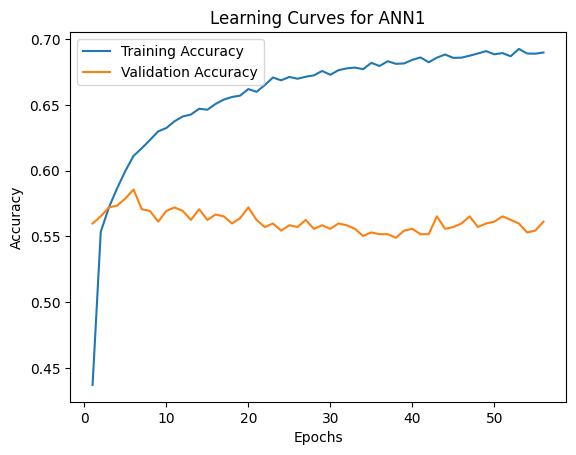

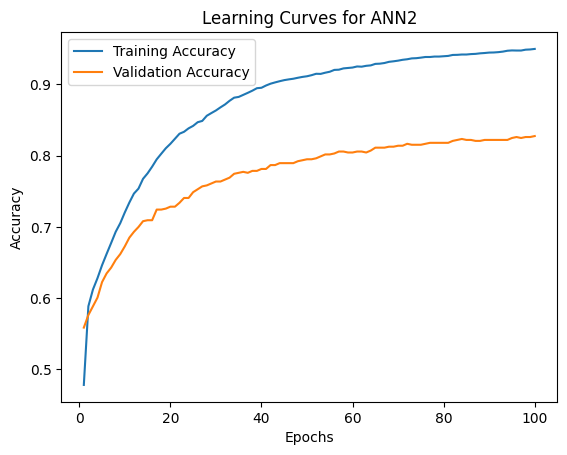

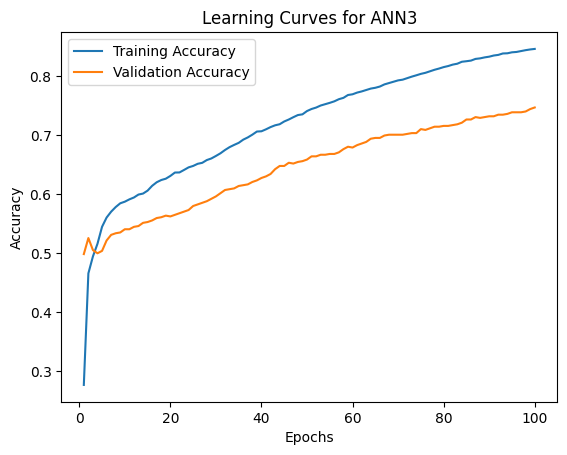

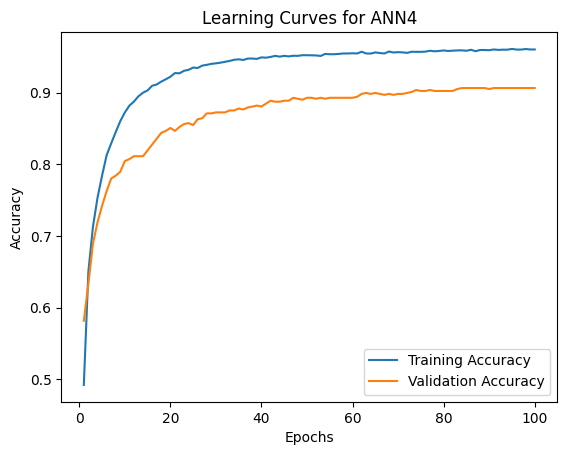

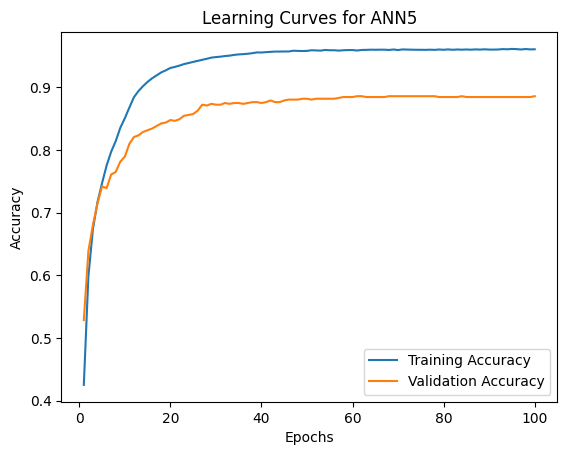

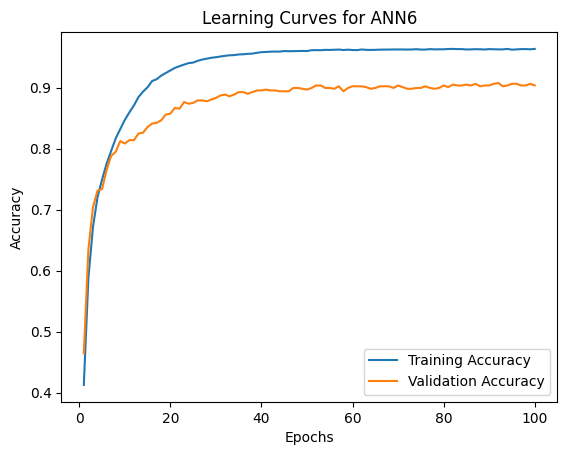

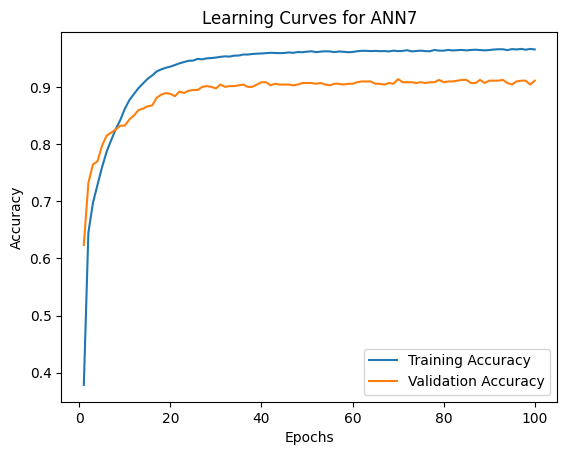

In [ ]:
model_list = ["ANN1", "ANN2", "ANN3", "ANN4", "ANN5", "ANN6", "ANN7"]
history_list = [history_1, history_2, history_3, history_4, history_5, history_6, history_7]

for i in range(len(model_list)):
  history = history_list[i]
  # Access the training and validation errors from the history object
  train_errors = history.history['categorical_accuracy']
  val_errors = history.history['val_categorical_accuracy']

  # Get the number of epochs
  epochs = range(1, len(train_errors) + 1)

  # Plotting the learning curves
  plt.plot(epochs, train_errors, label='Training Accuracy')
  plt.plot(epochs, val_errors, label='Validation Accuracy')

  # Adding labels and title
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(f'Learning Curves for {model_list[i]}')
  plt.legend()

  # Displaying the plot
  plt.show()

Se imprimieron las curvas para todos los modelos generados, incluyendo los primeros realizados. Se puede ver que los modelos que obtienen los mejores resultados son el ANN6 y ANN7, porque alcanza los valores más altos en el *validation accuracy* y en ningún momento disminuye notoriamente mientras el training accuracy sigue aumentando, lo cual indica que no está sobreajustado.

> **o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.**

In [ ]:
# Red neuronal: input_layer -> hidden_layer(256, relu) ->
#               hidden_layer(128, relu) -> hidden_layer(64, relu) ->
#               hidden_layer(32, relu) -> output_layer
input_layer = tf.keras.layers.Input(shape=(x_train.shape[1:]))
layer_1 = tf.keras.layers.Dense(units=256, activation='relu')(input_layer)
layer_2 = tf.keras.layers.Dense(units=128, activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(units=64, activation='relu')(layer_2)
layer_4 = tf.keras.layers.Dense(units=32, activation='relu')(layer_3)
output_layer = tf.keras.layers.Dense(units=(y_train_OHE.shape[1]), activation='softmax')(layer_4)

ANN = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
ANN.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

early_stop = EarlyStopping(monitor='categorical_accuracy', mode='max', verbose=1, patience=50)

history = ANN.fit(x_train, y_train_OHE,
                  batch_size=256,
                  epochs=100,
                  validation_split=0.0,
                  callbacks=[early_stop])

Epoch 1/100
29/29 [==============================] - 1s 14ms/step - loss: 1.4346 - categorical_accuracy: 0.4283
Epoch 2/100
29/29 [==============================] - 0s 12ms/step - loss: 1.1735 - categorical_accuracy: 0.5803
Epoch 3/100
29/29 [==============================] - 1s 20ms/step - loss: 1.0085 - categorical_accuracy: 0.6821
Epoch 4/100
29/29 [==============================] - 1s 20ms/step - loss: 0.8651 - categorical_accuracy: 0.7376
Epoch 5/100
29/29 [==============================] - 1s 21ms/step - loss: 0.7413 - categorical_accuracy: 0.7757
Epoch 6/100
29/29 [==============================] - 1s 17ms/step - loss: 0.6379 - categorical_accuracy: 0.8071
Epoch 7/100
29/29 [==============================] - 0s 11ms/step - loss: 0.5529 - categorical_accuracy: 0.8326
Epoch 8/100
29/29 [==============================] - 1s 18ms/step - loss: 0.4834 - categorical_accuracy: 0.8530
Epoch 9/100
29/29 [==============================] - 1s 18ms/step - loss: 0.4274 - categorical_accuracy:

> **p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.**

In [ ]:
y_pred = ANN(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_test_comp = np.argmax(y_test_OHE, axis=1)

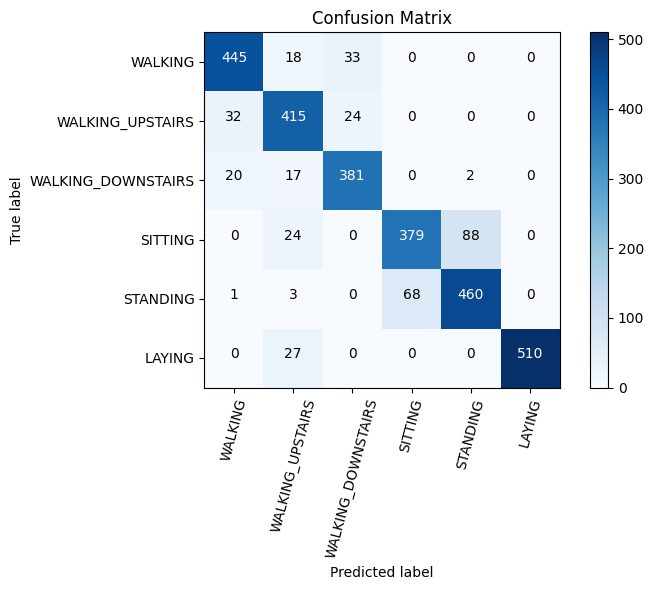

In [ ]:
cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()

> **q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.**

**Respuesta:** Viendo la diagonal de la matriz de confusión se puede apreciar que el modelo tiene buen poder predictivo para todas las clases. El mejor desempeño se encuentra en la clase *Laying*, que de un total de 537 experimentos etiquetados como *Laying* identificó 510 bien y 27 identificó como *Walking_Upstairs*.

También, es posible apreciar que la mayor dificultad de la red se encuentra en diferenciar entre las clases de tipo *Walking*, lo cual se puede explicar dada la similitud de los movimientos en la vida real.

### 2.2.2 AdaBoost y arbustos

> **a) Describa brevemente como funciona el modelo AdaBoost.**

**Respuesta:** Adaboost se basa en el trabajo de learners débiles en cada ronda, para así generar learners fuertes. Cada iteración o etapa de Adaboost produce resultados que son clasificados como correctos o erróneos, a los cuales se les entrega un valor para centrarse en ellos. Los resultados erróneos son mayormente valorados para de esa manera centrarse en ellos con los learners más fuertes que se producen en las iteraciones más avanzadas.

> **b) ¿Qué clasificador se puede usar junto con Adaboost?**

**Respuesta:** Adaboost trabaja con learners débiles para así obtener resultados rápidos con el fin de mejorar sus resultados a futuro cuando consiga learners fuertes.

Para conseguir lo anterior se puede usar Árboles de decisión débiles, Clasificadores lineales y SVM lineales débiles.

> **c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?**

**Respuesta:** El learning rate tiene la función de determinar el peso de cada estimador en cada iteración de AdaBoost. Un valor alto del learning rate causará que los resultados se ajusten más a los estimadores, causando sobre ajuste si es demasiado alto.

> **d) Separe el conjunto de entrenamiento dejando el 10% para validación.**

Listo 👍

> **e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1**

Listo 👍

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py



In [ ]:
# Respuesta de la d)
X_train_ada, X_val_ada, y_train_ada, y_val_ada = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Respuesta de la e)
ada_model_300 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

In [ ]:
ada_model_300.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

> **f) Revise el error de validación con el conjunto de validación.**

In [ ]:
ada_model_300_errors = []

for ada_val_predict in ada_model_300.staged_predict(X_val_ada):
    ada_model_300_errors.append(1.0 - accuracy_score(ada_val_predict, y_val_ada))

In [ ]:
print(f"Mayor error de validación: {max(ada_model_300_errors)}")
print(f"Menor error de validación: {min(ada_model_300_errors)}")
print(f"Promedio error de validación: {np.mean(ada_model_300_errors)}")

Mayor error de validación: 0.49184782608695654
Menor error de validación: 0.16032608695652173
Promedio error de validación: 0.21657608695652178


> **g) Haga la misma prueba pero ahora con 30 estimadores**

In [ ]:
ada_model_30 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1
)
ada_model_30.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=30)

In [ ]:
ada_model_30_errors = []

for ada_val_predict in ada_model_30.staged_predict(X_val_ada):
    ada_model_30_errors.append(1.0 - accuracy_score(ada_val_predict, y_val_ada))

In [ ]:
print(f"Mayor error de validación: {max(ada_model_30_errors)}")
print(f"Menor error de validación: {min(ada_model_30_errors)}")
print(f"Promedio error de validación: {np.mean(ada_model_30_errors)}")

Mayor error de validación: 0.49184782608695654
Menor error de validación: 0.2595108695652174
Promedio error de validación: 0.29284420289855073


Dado que el modelo que tiene menor error promedio de validación y, además, alcanza valores de error más bajos es el modelo con 300 estimadores, se selecciona este como el mejor.

> **h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejor modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.**

In [ ]:
ada_model_300 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

ada_model_300.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

In [ ]:
y_pred = ada_model_300.predict(x_test)
y_pred

array([5, 5, 5, ..., 2, 2, 1], dtype=int32)

> **i) Muestre la matriz de confusión y comente sus resultados.**

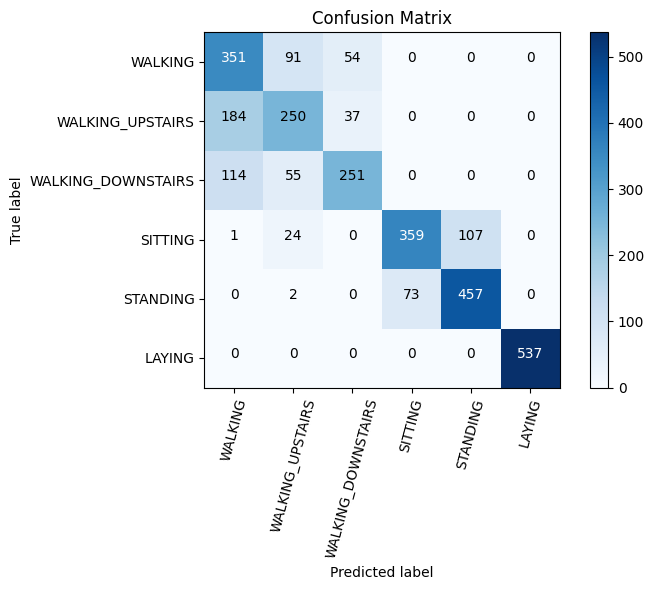

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()

En la matriz de confusión se puede apreciar que el modelo tiene dificultades a la hora de poder identificar bien las diferentes clases *Walking*, especialmente relacionado a la subida y bajada de escaleras. Por otro lado, la predicción de la clase *Laying* es perfecta, con 0 clasificaciones erróneas.

Con esto, se puede concluir que el modelo tiene buen poder para identificar movimientos que son de naturaleza diferente, pero cuando son movimientos similares presenta dificultades.

## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

**Respuesta:** El modelo que obtuvo la mejor capacidad predictiva fue el modelo de **Redes Neuronales**. Viendo su matriz de confusión, se aprecia dominancia en la diagonal principal. Se puede ver que las clases que obtuvieron mayor cantidad de falsos positivos fueron *Standing* y *Sitting*, lo cual puede deberse a la similitud de estos movimientos.

AdaBoost, por su parte, mostró menor poder predictivo en este contexto. Particularmente, se aprecia un error de predicción entre las clases *Walking*, *Walking_Upstairs* y *Walking_Downstairs*. Para mejorar los resultados de este modelo, se puede aumentar la profundidad máxima de los estimadores base (árboles de decisión) o aumentar el número máximo de estimadores. También, se pueden realizar varios experimentos con learning_rate diferente, tomando las precauciones necesarias para evitar sobreajuste, puesto que si se toman valores muy altos de learning_rate este riesgo aumenta.